In [16]:
import pandas as pd

#### 1. Loading in all data txt files

In [17]:
reflectors_data = {}
for i in range(1,8):
    # Read the file
    reflectors_data[i] = pd.read_csv(f'Chilbolton_data/20170511/rel11/Clean_data/reflector_{i}', sep='\s+', header=None)


# Now data[i] contains the contents of the file for each i
print(reflectors_data)

{1:                0          1          2          3        4        5        6  \
0       0.000000  291.83509  98612.933  14035.736  3.50600  1.20925  0.03875   
1       5.000013  291.84755  98618.859  13996.320  3.63525  2.21100  0.29150   
2       9.999986  291.85084  98628.960  13948.861  4.04225  3.26700  0.46925   
3      14.999999  291.92481  98634.693  13939.524  3.25525  3.04375  0.07500   
4      20.000012  292.06371  98634.516  13970.673  0.87525  2.55650  0.44150   
..           ...        ...        ...        ...      ...      ...      ...   
612  3094.000000  292.62922  98562.307  13739.592  0.86850  2.46075 -0.06225   
613  3099.000000  292.55387  98582.814  13652.394  0.87950  3.17000 -0.21000   
614  3104.000000  292.47007  98583.756  13574.718  0.81100  1.89525  0.82575   
615  3109.000000  292.32066  98566.285  13439.150  1.28375  3.03125  0.58375   
616  3114.000000  292.26239  98563.061  13373.329  1.94000  3.87100  0.50225   

           7         8         9  


### A. CH4 Measurement Data

#### 2. Keeping only the time and CH4 measurements

In [38]:
reflector_1 = reflectors_data[1][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_2 = reflectors_data[2][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_3 = reflectors_data[3][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_4 = reflectors_data[4][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_5 = reflectors_data[5][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_6 = reflectors_data[6][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
reflector_7 = reflectors_data[7][[0,8]].rename(columns={0:'Time', 8:'Measurements'})
# Now df has the columns renamed
print(reflector_7)

            Time  Measurements
0       0.000000      1.947490
1       6.000008      1.935211
2      11.000021      1.941722
3      15.999994      1.976920
4      21.000007      1.989711
..           ...           ...
611  3095.000000      1.982052
612  3100.000000      2.000047
613  3105.000000      1.949110
614  3110.000000      2.002605
615  3115.000000      1.973913

[616 rows x 2 columns]


#### 3. Tranforming elapsed time to clock time

In [39]:
import pandas as pd

def add_clock_time(df, start_time_str, purpose = 'measurements'):
    # Convert the 'Time' column to timedelta
    df['Time'] = pd.to_timedelta(df['Time'], unit='s')

    # Define the start time
    start_time = pd.Timestamp(start_time_str)

    if purpose == 'measurements':
        # Add the timedelta to the start time
        df['Clock_Time'] = (start_time + df['Time'])
        df = df[['Clock_Time', 'Measurements']]
    elif purpose == 'wind_field':
        df['Clock_Time'] = (start_time + df['Time'])
        df = df[['Clock_Time', 'wind_x', 'wind_y']]
    
    return df

In [40]:
reflector_1 = add_clock_time(reflector_1, '14:23:53', 'measurements')
reflector_2 = add_clock_time(reflector_2, '14:23:53', 'measurements')
reflector_3 = add_clock_time(reflector_3, '14:23:54', 'measurements')
reflector_4 = add_clock_time(reflector_4, '14:23:54', 'measurements')
reflector_5 = add_clock_time(reflector_5, '14:23:55', 'measurements')
reflector_6 = add_clock_time(reflector_6, '14:23:55', 'measurements')
reflector_7 = add_clock_time(reflector_7, '14:23:55', 'measurements')
print(reflector_7)

                       Clock_Time  Measurements
0   2024-01-18 14:23:55.000000000      1.947490
1   2024-01-18 14:24:01.000007700      1.935211
2   2024-01-18 14:24:06.000021000      1.941722
3   2024-01-18 14:24:10.999994000      1.976920
4   2024-01-18 14:24:16.000007000      1.989711
..                            ...           ...
611 2024-01-18 15:15:30.000000000      1.982052
612 2024-01-18 15:15:35.000000000      2.000047
613 2024-01-18 15:15:40.000000000      1.949110
614 2024-01-18 15:15:45.000000000      2.002605
615 2024-01-18 15:15:50.000000000      1.973913

[616 rows x 2 columns]


#### 4. Dividing the concentration of the line-of-sight by the number of point sensors we simulate. 
 - We start with one point sensor for every 2m of line-of-sight. This gives us:
 
    - Reflector 1: 35m -> 18 sensors
    - Reflector 2: 65m -> 33 sensors
    - Reflector 3: 44m -> 22 sensors
    - Reflector 4: 98m -> 49 sensors
    - Reflector 5: 83m -> 42 sensors
    - Reflector 6: 58m -> 29 sensors
    - Reflector 7: 34m -> 17 sensors


In [55]:
reflector_1["Measurements"] = reflector_1["Measurements"]/18
reflector_2["Measurements"] = reflector_2["Measurements"]/33
reflector_3["Measurements"] = reflector_3["Measurements"]/22
reflector_4["Measurements"] = reflector_4["Measurements"]/49
reflector_5["Measurements"] = reflector_5["Measurements"]/42
reflector_6["Measurements"] = reflector_6["Measurements"]/29
reflector_7["Measurements"] = reflector_7["Measurements"]/17
print(reflector_7["Measurements"])

0      0.114558
1      0.113836
2      0.114219
3      0.116289
4      0.117042
         ...   
611    0.116591
612    0.117650
613    0.114654
614    0.117800
615    0.116113
Name: Measurements, Length: 616, dtype: float64


#### 5. Averaging CH4 concentrations into bins of 1min

In [56]:
def resample_and_average(df):
    # Add an arbitrary date to time_column
    df['Clock_Time'] = pd.to_datetime(df['Clock_Time'])

    # Set time_column as the index
    df = df.set_index('Clock_Time')

    # Resample and calculate the average
    df_resampled = df.resample('1T').mean()

    return df_resampled

In [57]:
reflector_1_1min = resample_and_average(reflector_1)
reflector_2_1min = resample_and_average(reflector_2)
reflector_3_1min = resample_and_average(reflector_3)
reflector_4_1min = resample_and_average(reflector_4)
reflector_5_1min = resample_and_average(reflector_5)
reflector_6_1min = resample_and_average(reflector_6)
reflector_7_1min = resample_and_average(reflector_7)

print(reflector_1_1min)

                     Measurements
Clock_Time                       
2024-01-18 14:23:00      0.111857
2024-01-18 14:24:00      0.109991
2024-01-18 14:25:00      0.111300
2024-01-18 14:26:00      0.112508
2024-01-18 14:27:00      0.110222
2024-01-18 14:28:00      0.111567
2024-01-18 14:29:00      0.112209
2024-01-18 14:30:00      0.112802
2024-01-18 14:31:00      0.116060
2024-01-18 14:32:00      0.139990
2024-01-18 14:33:00      0.188430
2024-01-18 14:34:00      0.220075
2024-01-18 14:35:00      0.159976
2024-01-18 14:36:00      0.111492
2024-01-18 14:37:00      0.113519
2024-01-18 14:38:00      0.117474
2024-01-18 14:39:00      0.146622
2024-01-18 14:40:00      0.118713
2024-01-18 14:41:00      0.113477
2024-01-18 14:42:00      0.116834
2024-01-18 14:43:00      0.120585
2024-01-18 14:44:00      0.115162
2024-01-18 14:45:00      0.182064
2024-01-18 14:46:00      0.170934
2024-01-18 14:47:00      0.147129
2024-01-18 14:48:00      0.190994
2024-01-18 14:49:00      0.143104
2024-01-18 14:

#### 6. Duplicating the data by the number of point sensors we averaged the line-of-sight over

In [10]:
point_sensors_1min_ref1 = pd.concat([reflector_1_1min]*18).reset_index(drop=True)
point_sensors_1min_ref2 = pd.concat([reflector_2_1min]*33).reset_index(drop=True)
point_sensors_1min_ref3 = pd.concat([reflector_3_1min]*22).reset_index(drop=True)
point_sensors_1min_ref4 = pd.concat([reflector_4_1min]*49).reset_index(drop=True)
point_sensors_1min_ref5 = pd.concat([reflector_5_1min]*42).reset_index(drop=True)
point_sensors_1min_ref6 = pd.concat([reflector_6_1min]*29).reset_index(drop=True)
point_sensors_1min_ref7 = pd.concat([reflector_7_1min]*17).reset_index(drop=True)

# Now df_duplicated contains the duplicated data
print(point_sensors_1min_ref1)

     Measurements
0        0.111857
1        0.109991
2        0.111300
3        0.112508
4        0.110222
..            ...
949      0.112324
950      0.112356
951      0.113046
952      0.112990
953      0.114009

[954 rows x 1 columns]


#### 7. Finally, merge all datasets to obtain vector y

In [15]:
# Assume point_sensors_1min_ref1, ..., point_sensors_1min_ref7 are your DataFrames
df_merged = pd.concat([point_sensors_1min_ref1, point_sensors_1min_ref2, point_sensors_1min_ref3, \
                        point_sensors_1min_ref4, point_sensors_1min_ref5, point_sensors_1min_ref6, \
                        point_sensors_1min_ref7]).reset_index(drop=True)

# Now df_merged contains the merged data
print(df_merged)

       Measurements
0          0.111857
1          0.109991
2          0.111300
3          0.112508
4          0.110222
...             ...
11125      0.115819
11126      0.116849
11127      0.116158
11128      0.116061
11129      0.116939

[11130 rows x 1 columns]


#### 8. Saving data

In [17]:
import pickle
with open('Chilbolton_rel11_1min.pkl', 'wb') as f:
    pickle.dump(df_merged, f)


<br>
<br>
<br>

### B. Wind Field

In [86]:
wind_1 = reflectors_data[1][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_2 = reflectors_data[2][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_3 = reflectors_data[3][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_4 = reflectors_data[4][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_5 = reflectors_data[5][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_6 = reflectors_data[6][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
wind_7 = reflectors_data[7][[0,4,5]].rename(columns={0:'Time', 4:'wind_x', 5:'wind_y'})
# Now wind_x has the columns renamed
print(wind_7)

            Time   wind_x   wind_y
0       0.000000  3.90650  1.92400
1       6.000008  4.51050  3.75625
2      11.000021  3.24000  4.08225
3      15.999994  1.99450  2.33100
4      21.000007  2.68700  3.09375
..           ...      ...      ...
611  3095.000000  1.15050  3.27925
612  3100.000000  0.73975  3.10475
613  3105.000000  2.35250  2.14725
614  3110.000000  0.51275  2.81750
615  3115.000000  1.22275  5.18650

[616 rows x 3 columns]


#### 1. Adding clock time

In [66]:
wind_1 = add_clock_time(wind_1, '14:23:53', 'wind_field')
wind_2 = add_clock_time(wind_2, '14:23:53', 'wind_field')
wind_3 = add_clock_time(wind_3, '14:23:54', 'wind_field')
wind_4 = add_clock_time(wind_4, '14:23:54', 'wind_field')
wind_5 = add_clock_time(wind_5, '14:23:55', 'wind_field')
wind_6 = add_clock_time(wind_6, '14:23:55', 'wind_field')
wind_7 = add_clock_time(wind_7, '14:23:55', 'wind_field')
print(wind_1)

                       Clock_Time   wind_x   wind_y
0   2024-01-18 14:23:53.000000000  3.50600  1.20925
1   2024-01-18 14:23:58.000013100  3.63525  2.21100
2   2024-01-18 14:24:02.999986000  4.04225  3.26700
3   2024-01-18 14:24:07.999999000  3.25525  3.04375
4   2024-01-18 14:24:13.000012000  0.87525  2.55650
..                            ...      ...      ...
612 2024-01-18 15:15:27.000000000  0.86850  2.46075
613 2024-01-18 15:15:32.000000000  0.87950  3.17000
614 2024-01-18 15:15:37.000000000  0.81100  1.89525
615 2024-01-18 15:15:42.000000000  1.28375  3.03125
616 2024-01-18 15:15:47.000000000  1.94000  3.87100

[617 rows x 3 columns]


#### 2. Calculating wind speed and direction based on speeds along the x-axis and y-axis

In [67]:
import numpy as np
import pandas as pd

def calculate_wind_direction_and_speed(df, x_wind_speed_column, y_wind_speed_column):
    # Calculate the wind speed
    df['Wind Speed'] = np.sqrt(df[x_wind_speed_column]**2 + df[y_wind_speed_column]**2)

    # Calculate the wind direction
    df['Wind Direction'] = np.arctan2(df[y_wind_speed_column], df[x_wind_speed_column]) * (180.0 / np.pi)

    # Convert wind direction from meteorological to mathematical convention
    df['Wind Direction'] = (450 - df['Wind Direction']) % 360

    return df[['Clock_Time','Wind Speed', 'Wind Direction']]

In [68]:
wind_field_1 = calculate_wind_direction_and_speed(wind_1, 'wind_x', 'wind_y')
wind_field_2 = calculate_wind_direction_and_speed(wind_2, 'wind_x', 'wind_y')
wind_field_3 = calculate_wind_direction_and_speed(wind_3, 'wind_x', 'wind_y')
wind_field_4 = calculate_wind_direction_and_speed(wind_4, 'wind_x', 'wind_y')
wind_field_5 = calculate_wind_direction_and_speed(wind_5, 'wind_x', 'wind_y')
wind_field_6 = calculate_wind_direction_and_speed(wind_6, 'wind_x', 'wind_y')
wind_field_7 = calculate_wind_direction_and_speed(wind_7, 'wind_x', 'wind_y')
print(wind_field_7)

                       Clock_Time  Wind Speed  Wind Direction
0   2024-01-18 14:23:55.000000000    4.354597       63.779178
1   2024-01-18 14:24:01.000007700    5.869755       50.213176
2   2024-01-18 14:24:06.000021000    5.211753       38.438327
3   2024-01-18 14:24:10.999994000    3.067832       40.551664
4   2024-01-18 14:24:16.000007000    4.097714       40.975140
..                            ...         ...             ...
611 2024-01-18 15:15:30.000000000    3.475217       19.333034
612 2024-01-18 15:15:35.000000000    3.191661       13.401645
613 2024-01-18 15:15:40.000000000    3.185112       47.611659
614 2024-01-18 15:15:45.000000000    2.863777       10.314241
615 2024-01-18 15:15:50.000000000    5.328686       13.265609

[616 rows x 3 columns]


In [69]:
import matplotlib.pyplot as plt

def plot_time_series(df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot wind speed
    axs[0].plot(df.index, df['Wind Speed'])
    axs[0].set_title('Wind Speed')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Speed m/s')

    # Plot wind direction
    axs[1].plot(df.index, df['Wind Direction'])
    axs[1].set_title('Wind Direction')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Direction')

    plt.tight_layout()
    plt.show()

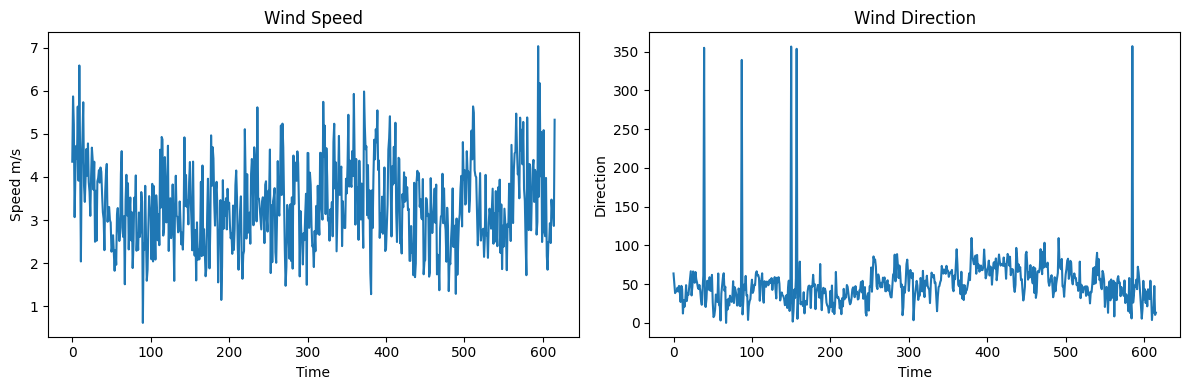

In [70]:
plot_time_series(wind_field_7)

#### 3. Averaging speed and direction into bins of 1min

In [84]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [85]:
wind_1_1min = resample_and_average(wind_field_1).reset_index(drop=True)
wind_2_1min = resample_and_average(wind_field_2).reset_index(drop=True)
wind_3_1min = resample_and_average(wind_field_3).reset_index(drop=True)
wind_4_1min = resample_and_average(wind_field_4).reset_index(drop=True)
wind_5_1min = resample_and_average(wind_field_5).reset_index(drop=True)
wind_6_1min = resample_and_average(wind_field_6).reset_index(drop=True)
wind_7_1min = resample_and_average(wind_field_7).reset_index(drop=True)
print(wind_7_1min)

    Wind Speed  Wind Direction
0     4.354597       63.779178
1     4.526841       39.538942
2     4.162815       40.062330
3     3.829776       49.077104
4     3.400725       68.082303
5     2.528662       27.395320
6     3.261310       36.258225
7     2.895640       35.029820
8     2.608951       59.131055
9     2.907345       45.937198
10    3.561420       48.895119
11    3.114575       50.229340
12    3.119493       39.344560
13    3.421193       56.889986
14    2.620675       65.079244
15    2.858719       37.564417
16    3.156530       40.769428
17    3.109096       31.739994
18    2.921535       27.774097
19    3.022079       34.058814
20    3.856616       38.950162
21    3.247198       35.208433
22    3.038753       63.395955
23    3.640766       51.677892
24    2.999908       53.842565
25    3.156795       52.090085
26    3.140338       52.980137
27    3.469816       45.212749
28    3.530776       51.787908
29    4.027420       48.052050
30    3.638747       66.121368
31    3.

In [78]:
def plot_multiple_time_series(df1, df2, df3, df4, df5, df6, df7):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot wind speed
    axs[0].plot(df1.index, df1['Wind Speed'], label='wind1')
    axs[0].plot(df2.index, df2['Wind Speed'], label='wind2')
    axs[0].plot(df3.index, df3['Wind Speed'], label='wind3')
    axs[0].plot(df4.index, df4['Wind Speed'], label='wind4')
    axs[0].plot(df5.index, df5['Wind Speed'], label='wind5')
    axs[0].plot(df6.index, df6['Wind Speed'], label='wind6')
    axs[0].plot(df7.index, df7['Wind Speed'], label='wind7')
    axs[0].set_title('Wind Speed')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Speed m/s')
    axs[0].legend()

    # Plot wind direction
    axs[1].plot(df1.index, df1['Wind Direction'], label='wind1')
    axs[1].plot(df2.index, df2['Wind Direction'], label='wind2')
    axs[1].plot(df3.index, df3['Wind Direction'], label='wind3')
    axs[1].plot(df4.index, df4['Wind Direction'], label='wind4')
    axs[1].plot(df5.index, df5['Wind Direction'], label='wind5')
    axs[1].plot(df6.index, df6['Wind Direction'], label='wind6')
    axs[1].plot(df7.index, df7['Wind Direction'], label='wind7')
    axs[1].set_title('Wind Direction')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Direction')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

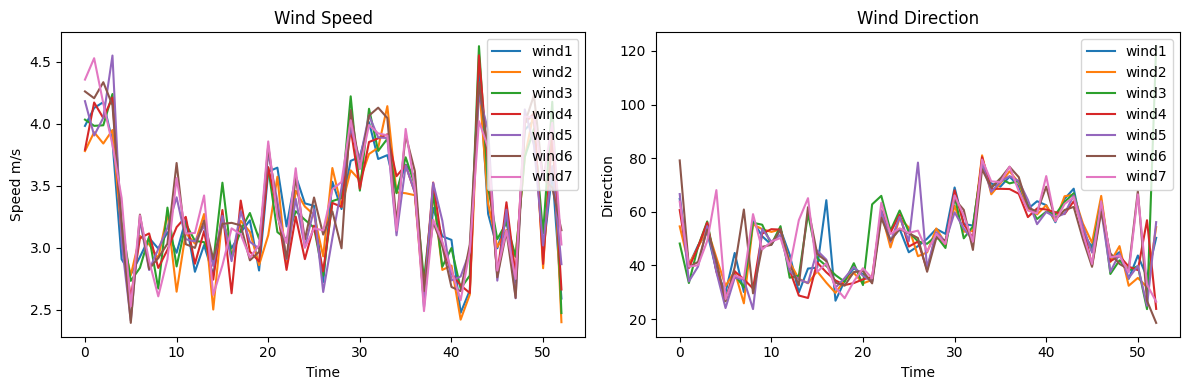

In [79]:
plot_multiple_time_series(wind_1_1min, wind_2_1min, wind_3_1min, wind_4_1min, wind_5_1min, wind_6_1min, wind_7_1min)

#### 4. (Check with Shell) Averaging wind fields

In [92]:
def average_wind_fields(dfs):
    # Initialize DataFrames to store the average wind speed and direction
    df_avg_speed = pd.DataFrame()
    df_avg_direction = pd.DataFrame()

    # Calculate the average wind speed and direction
    for df in dfs:
        df_avg_speed = pd.concat([df_avg_speed, df['Wind Speed']], axis=1)
        df_avg_direction = pd.concat([df_avg_direction, df['Wind Direction']], axis=1)

    df_avg = pd.DataFrame()
    df_avg['Average Speed'] = df_avg_speed.mean(axis=1)
    df_avg['Average Direction'] = df_avg_direction.mean(axis=1)

    return df_avg

In [95]:
dfs = [wind_1_1min, wind_2_1min, wind_3_1min, wind_4_1min, wind_5_1min, wind_6_1min, wind_7_1min]
windfield_avg = average_wind_fields(dfs)
print(windfield_avg)

    Average Speed  Average Direction
0        4.053931          62.534761
1        4.120709          37.971015
2        4.083932          44.156240
3        4.111633          53.661221
4        3.139466          43.533645
5        2.604967          27.863728
6        3.098856          38.244086
7        2.979681          36.161627
8        2.847921          44.501180
9        3.116153          51.139365
10       3.181932          49.568215
11       3.143318          52.863117
12       2.991046          39.479347
13       3.184405          36.315411
14       2.755727          45.640946
15       3.229990          41.157620
16       2.960782          42.798930
17       3.207019          32.051570
18       3.066966          32.968922
19       2.946155          37.345351
20       3.635848          35.762342
21       3.366524          38.532722
22       2.967116          60.986499
23       3.455614          50.146430
24       3.128274          56.590793
25       3.259303          50.239028
2

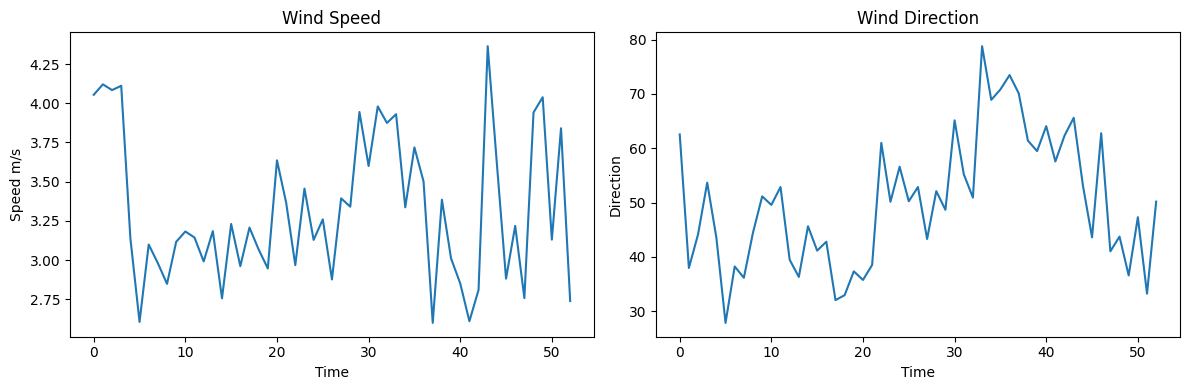

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot wind speed
axs[0].plot(windfield_avg.index, windfield_avg['Average Speed'])
axs[0].set_title('Wind Speed')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Speed m/s')

# Plot wind direction
axs[1].plot(windfield_avg.index, windfield_avg['Average Direction'])
axs[1].set_title('Wind Direction')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Direction')

plt.tight_layout()
plt.show()

#### 5. Saving data

In [97]:
import pickle
with open('Chilbolton_rel11_1min_windfield.pkl', 'wb') as f:
    pickle.dump(windfield_avg, f)
